In [1]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import io
import sys
import logging
from new_strategy import TradingStrategy, Asset, BetSizingMethod, get_bet_sizing
from meta_strategy import MetaLabelingStrategy
import nbimporter
from backtest import Backtest
from add_features import generate_meta_labeled_data, merge_with_raw_features
from metalabel_backtest import MetaModelHandler
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
%load_ext autoreload
%autoreload 2

2025-07-31 15:45:38,721 - INFO - Strategy initialized for GAS using FixedFractionalBetSizing


📦 Creating TradeSetup with:
  entry_time: 2020-01-02 00:00:00+00:00
  atr_14: nan, ma_14: nan, min_price_30: nan, max_price_30: nan
  context keys: ['ma_14', 'min_price_30', 'max_price_30', 'atr_14', 'daily_return', 'daily_volatility', 't10yie', 'vix_close', 'day_of_week', 'hour_of_day', 'dgs10', 'avg_return_30d', 'drawdown_30', 'close', 'drawdown_static', 'high', 'daily_low', 'week_number', 'max_price_14', 'true_range', 'daily_high', 'low', 'volume', 'dtwexbgs', 'open', 'min_price_14', 'cpiaucsl', 'daily_close', 'volume_shifted', 'attempt', 'ref_close', 'duration_minutes', 'session', 'rolling_f1', 'rolling_accuracy', 'rolling_precision', 'rolling_recall', 'n_total_seen', 'n_window_obs', 'session_code']
📦 Creating TradeSetup with:
  entry_time: 2020-01-02 08:00:00+00:00
  atr_14: nan, ma_14: nan, min_price_30: nan, max_price_30: nan
  context keys: ['ma_14', 'min_price_30', 'max_price_30', 'atr_14', 'daily_return', 'daily_volatility', 't10yie', 'vix_close', 'day_of_week', 'hour_of_day'

[I 2025-07-31 15:50:18,963] A new study created in memory with name: no-name-323b4a99-e598-4bec-bbdb-1bd5e818cf42



📊 Sanity Check for LONG dataset
  → Shape: (2397, 24)
  → NaNs in X: 0
  → All-zero columns: 0
  → y balance: [1368 1029]

📊 Sanity Check for SHORT dataset
  → Shape: (2349, 25)
  → NaNs in X: 0
  → All-zero columns: 0
  → y balance: [1431  918]
[Optuna] Tuning LONG model...


[I 2025-07-31 15:50:19,512] Trial 0 finished with value: 0.4872212029881437 and parameters: {'learning_rate': 0.08116262258099886, 'num_leaves': 62, 'max_depth': 8}. Best is trial 0 with value: 0.4872212029881437.
[I 2025-07-31 15:50:19,675] Trial 1 finished with value: 0.4943090211290594 and parameters: {'learning_rate': 0.12374511199743694, 'num_leaves': 27, 'max_depth': 4}. Best is trial 1 with value: 0.4943090211290594.
[I 2025-07-31 15:50:20,283] Trial 2 finished with value: 0.44071615577153433 and parameters: {'learning_rate': 0.021035886311957897, 'num_leaves': 58, 'max_depth': 7}. Best is trial 1 with value: 0.4943090211290594.
[I 2025-07-31 15:50:20,744] Trial 3 finished with value: 0.5061092134936005 and parameters: {'learning_rate': 0.14453378978124864, 'num_leaves': 20, 'max_depth': 10}. Best is trial 3 with value: 0.5061092134936005.
[I 2025-07-31 15:50:20,878] Trial 4 finished with value: 0.5005189610144958 and parameters: {'learning_rate': 0.16816410175208013, 'num_leave

✅ Best parameters: {'learning_rate': 0.11699067193881905, 'num_leaves': 30, 'max_depth': 9}
📈 Best F1 score: 0.5160111060014672
[Optuna] Tuning SHORT model...


[I 2025-07-31 15:50:32,719] Trial 0 finished with value: 0.38659632473736444 and parameters: {'learning_rate': 0.08116262258099886, 'num_leaves': 62, 'max_depth': 8}. Best is trial 0 with value: 0.38659632473736444.
[I 2025-07-31 15:50:32,884] Trial 1 finished with value: 0.3797287393792711 and parameters: {'learning_rate': 0.12374511199743694, 'num_leaves': 27, 'max_depth': 4}. Best is trial 0 with value: 0.38659632473736444.
[I 2025-07-31 15:50:33,207] Trial 2 finished with value: 0.3479753565754701 and parameters: {'learning_rate': 0.021035886311957897, 'num_leaves': 58, 'max_depth': 7}. Best is trial 0 with value: 0.38659632473736444.
[I 2025-07-31 15:50:33,438] Trial 3 finished with value: 0.4040965598608969 and parameters: {'learning_rate': 0.14453378978124864, 'num_leaves': 20, 'max_depth': 10}. Best is trial 3 with value: 0.4040965598608969.
[I 2025-07-31 15:50:33,576] Trial 4 finished with value: 0.3937508409426755 and parameters: {'learning_rate': 0.16816410175208013, 'num_le

✅ Best parameters: {'learning_rate': 0.17000507164497228, 'num_leaves': 40, 'max_depth': 9}
📈 Best F1 score: 0.4576881484271208


/Users/manuelheeren/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


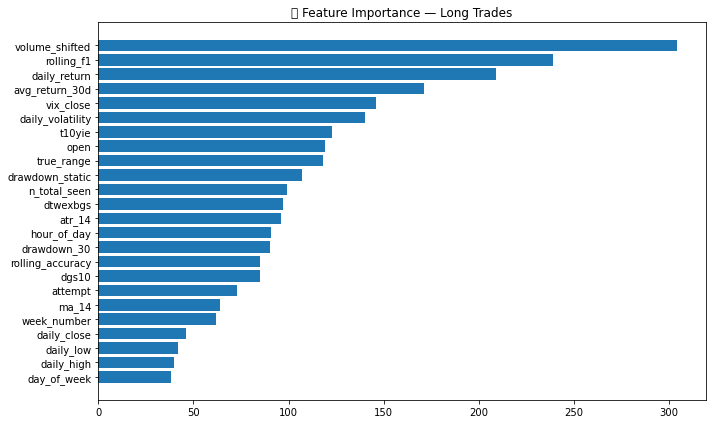

metalabel_backtest.ipynb:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  "        _sanity_check(X_short, y_short, \"SHORT\")\n",
/Users/manuelheeren/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


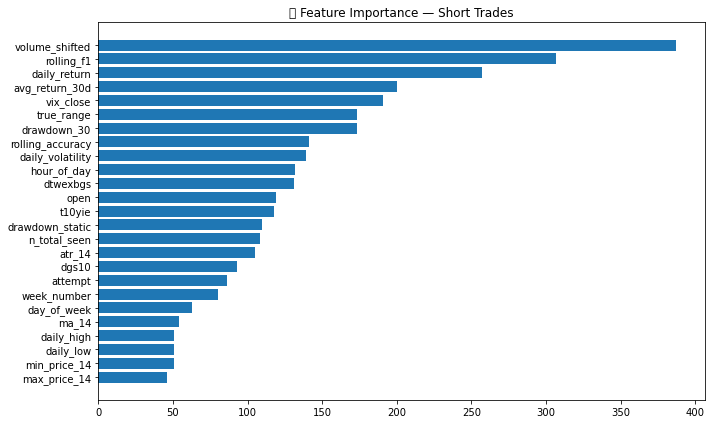

[SHAP] Generating plot for: Long
[SHAP] Saved to results_metalabel/shap/shap_gas_fixed_long.png
[SHAP] Summary CSV saved to results_metalabel/shap/shap_summary_gas_fixed_long.csv
[SHAP] Generating plot for: Short


2025-07-31 15:50:48,363 - INFO - Strategy initialized for GAS using FixedFractionalBetSizing


[SHAP] Saved to results_metalabel/shap/shap_gas_fixed_short.png
[SHAP] Summary CSV saved to results_metalabel/shap/shap_summary_gas_fixed_short.csv


2025-07-31 15:51:31,824 - INFO - Strategy initialized for GAS using FixedFractionalBetSizing



🔍 Entry Time Check (from shared_signals dict):
Type: <class 'dict'>
Keys in shared_signals: ['asian', 'london', 'us']
Type of entry_time: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


2025-07-31 15:51:32,149 - INFO - Strategy initialized for GAS using FixedFractionalBetSizing
2025-07-31 15:51:32,229 - INFO - Strategy initialized for GAS using FixedFractionalBetSizing



📊 Baseline features in .data:
['open', 'high', 'low', 'close', 'volume', 'date', 'daily_high', 'daily_low', 'daily_close', 'true_range', 'atr_14', 'ma_14', 'ma_30', 'ma_100', 'day_of_week', 'week_number', 'hour_of_day', 'max_price_14', 'min_price_14', 'max_price_30', 'min_price_30', 'max_price_100', 'min_price_100', 'drawdown_static', 'drawdown_30', 't10yie', 'cpiaucsl', 'vix_close', 'dtwexbgs', 'dgs10', 'daily_return', 'daily_volatility', 'regime', 'regime_label', 'avg_return_30d', 'volume_shifted']

📊 Filtered features in .data:
['open', 'high', 'low', 'close', 'volume', 'date', 'daily_high', 'daily_low', 'daily_close', 'true_range', 'atr_14', 'ma_14', 'ma_30', 'ma_100', 'day_of_week', 'week_number', 'hour_of_day', 'max_price_14', 'min_price_14', 'max_price_30', 'min_price_30', 'max_price_100', 'min_price_100', 'drawdown_static', 'drawdown_30', 't10yie', 'cpiaucsl', 'vix_close', 'dtwexbgs', 'dgs10', 'daily_return', 'daily_volatility', 'regime', 'regime_label', 'avg_return_30d', 'vol

2025-07-31 15:52:24,792 - INFO - Exported detailed trades to data/results/trades_detailed_GAS_fixed.csv
2025-07-31 15:52:24,876 - INFO - Saved backtest results to data/results/backtest_results_GAS_fixed.txt



=== GAS Backtest Results ===
Bet Sizing Strategy: fixedfractionalbetsizing

Period: 2023-07-04 to 2024-12-31

ASIAN Session Performance:
Initial Capital: $100,000.00
Final Capital: $106,386.81
Total PnL: $6,386.81
Return: 6.39%
Win Rate: 51.59% (324W/304L)
Max Drawdown: 2.50%
Sharpe Ratio: 1.51
Skewness: 0.301
Excess Kurtosis: -1.112

Attempt Analysis:

  Attempt 1:
  Trades: 391 (62.3% of session trades)
  PnL: $3,773.00
  Win Rate: 54.22% (212W/179L)
  Average Win: $100.48
  Average Loss: $-100.16

  Attempt 2:
  Trades: 166 (26.4% of session trades)
  PnL: $1,370.47
  Win Rate: 46.99% (78W/88L)
  Average Win: $119.56
  Average Loss: $-90.40

  Attempt 3:
  Trades: 71 (11.3% of session trades)
  PnL: $1,243.34
  Win Rate: 47.89% (34W/37L)
  Average Win: $129.97
  Average Loss: $-85.83

LONDON Session Performance:
Initial Capital: $100,000.00
Final Capital: $102,130.85
Total PnL: $2,130.85
Return: 2.13%
Win Rate: 41.23% (296W/422L)
Max Drawdown: 2.96%
Sharpe Ratio: 0.35
Skewness: 0.7

2025-07-31 15:52:25,696 - INFO - Exported detailed trades to data/results/trades_detailed_GAS_fixed.csv
2025-07-31 15:52:25,781 - INFO - Saved backtest results to data/results/backtest_results_GAS_fixed.txt



=== GAS Backtest Results ===
Bet Sizing Strategy: fixedfractionalbetsizing

Period: 2023-07-04 to 2024-12-31

ASIAN Session Performance:
Initial Capital: $100,000.00
Final Capital: $101,847.72
Total PnL: $1,847.72
Return: 1.85%
Win Rate: 53.96% (75W/64L)
Max Drawdown: 1.19%
Sharpe Ratio: 2.24
Skewness: -0.085
Excess Kurtosis: -1.671

Attempt Analysis:

  Attempt 1:
  Trades: 109 (78.4% of session trades)
  PnL: $1,876.92
  Win Rate: 57.80% (63W/46L)
  Average Win: $97.74
  Average Loss: $-97.29

  Attempt 2:
  Trades: 22 (15.8% of session trades)
  PnL: $443.46
  Win Rate: 50.00% (11W/11L)
  Average Win: $133.06
  Average Loss: $-92.75

  Attempt 3:
  Trades: 8 (5.8% of session trades)
  PnL: $-472.66
  Win Rate: 12.50% (1W/7L)
  Average Win: $13.78
  Average Loss: $-69.49

LONDON Session Performance:
Initial Capital: $100,000.00
Final Capital: $101,088.34
Total PnL: $1,088.34
Return: 1.09%
Win Rate: 46.82% (125W/142L)
Max Drawdown: 1.69%
Sharpe Ratio: 0.52
Skewness: 0.480
Excess Kurt


🔹 Baseline Strategy:
  Bear: Trades = 44, Avg PnL = -13.78, Total PnL = -606.38, Win Rate = 38.64%
  Bull: Trades = 444, Avg PnL = -0.57, Total PnL = -253.14, Win Rate = 41.89%
  Neutral: Trades = 1579, Avg PnL = 5.13, Total PnL = 8092.99, Win Rate = 44.71%


🔹 Meta-Filtered Strategy:
  Bear: Trades = 3, Avg PnL = 33.49, Total PnL = 100.48, Win Rate = 66.67%
  Bull: Trades = 134, Avg PnL = 11.32, Total PnL = 1516.80, Win Rate = 49.25%
  Neutral: Trades = 579, Avg PnL = 3.92, Total PnL = 2267.91, Win Rate = 47.50%


✅ CSVs saved to: results_metalabel
 - baseline_gas_fixed.csv
 - filtered_gas_fixed.csv

✅ Summaries saved to:
 - baseline_gas_fixed.txt
 - filtered_gas_fixed.txt

✅ Full evaluation written to: results_metalabel/comparison/evaluation_gas_fixed.txt


In [2]:
def split_price_data(price_data: pd.DataFrame, split_ratio: float = 0.7):
    split_idx = int(len(price_data) * split_ratio)
    return price_data.iloc[:split_idx], price_data.iloc[split_idx:]

def run_training_phase(asset: Asset, method: BetSizingMethod, price_data: pd.DataFrame):
    # Run base strategy
    past_returns = price_data['close'].pct_change().dropna()
    bet_sizing = get_bet_sizing(method, past_returns)
    
    strategy = TradingStrategy(price_data, asset.value, bet_sizing, method)
    strategy.generate_signals()
    strategy.simulate_trades()
    
    trade_df = strategy.get_trade_data()
    labeled = generate_meta_labeled_data(trade_df)
    #labeled_with_features = merge_with_raw_features(labeled, asset.value)
    labeled_with_features = labeled
    
    print(labeled_with_features.columns)
    return labeled_with_features

def train_meta_model(train_df: pd.DataFrame, long_feature_cols: list, short_feature_cols: list,asset, method) -> MetaModelHandler:
    # Shift rolling metrics to avoid lookahead bias
    rolling_cols = [
        'rolling_f1', 'rolling_accuracy', 'rolling_precision', 'rolling_recall',
        'n_total_seen', 'n_window_obs'
    ]
    for col in rolling_cols:
        if col in train_df.columns:
            train_df[col] = train_df.groupby('session')[col].shift(1)
    meta_model = MetaModelHandler()
    meta_model.train(train_df, long_feature_cols, short_feature_cols,asset.value, method.value)
    return meta_model


def run_parallel_evaluation(asset, method, test_price_data, signals, meta_model, feature_cols):
    past_returns = test_price_data['close'].pct_change().dropna()
    bet_sizing = get_bet_sizing(method, past_returns)

    #  First, initialize Meta strategy to access feature-enriched data
    meta_strategy = MetaLabelingStrategy(
        test_price_data.copy(), asset.value, bet_sizing, method,
        meta_model_handler=meta_model
    )
    feature_data = meta_strategy.data.copy()

    #  Use feature_data for both strategies
    baseline = TradingStrategy(feature_data.copy(), asset.value, bet_sizing, method)
    baseline.trade_signals = signals

    filtered = MetaLabelingStrategy(feature_data.copy(), asset.value, bet_sizing, method, meta_model_handler=meta_model,feature_cols=feature_cols)
    filtered.trade_signals = signals

    print("\n📊 Baseline features in .data:")
    print(baseline.data.columns.tolist())

    print("\n📊 Filtered features in .data:")
    print(filtered.data.columns.tolist())
    print("\n🕒 Baseline index:", baseline.data.index.name, baseline.data.index.dtype)
    print("🕒 Filtered index:", filtered.data.index.name, filtered.data.index.dtype)

    baseline.simulate_trades()
    filtered.simulate_trades()

    return baseline, filtered

def compare_backtests(baseline: TradingStrategy, filtered: MetaLabelingStrategy, asset: Asset, method: BetSizingMethod):
    def capture_regime_stats(strategy, name):
        buffer = io.StringIO()
        sys.stdout = buffer
        print(f"\n🔹 {name} Strategy:")

        df = strategy.get_trade_data()

        if 'regime_label' not in df.columns or 'pnl' not in df.columns:
            print("Required columns not found in trade data.")
        else:
            grouped = df.groupby('regime_label')

            for regime, group in grouped:
                trades = len(group)
                avg_pnl = group['pnl'].mean()
                total_pnl = group['pnl'].sum()
                wins = (group['pnl'] > 0).sum()
                winrate = wins / trades if trades > 0 else 0

                print(f"  {regime}: Trades = {trades}, "
                      f"Avg PnL = {avg_pnl:.2f}, Total PnL = {total_pnl:.2f}, "
                      f"Win Rate = {winrate:.2%}")

        sys.stdout = sys.__stdout__
        return buffer.getvalue()
    
    print("\n[BASELINE]")
    baseline_bt = Backtest(baseline)
    baseline_bt.run_analysis()
    baseline_buffer = io.StringIO()
    sys.stdout = baseline_buffer
    baseline_bt.print_summary()
    sys.stdout = sys.__stdout__
    baseline_summary = baseline_buffer.getvalue()
    print(baseline_summary)

    print("\n[META-FILTERED]")
    filtered_bt = Backtest(filtered)
    filtered_bt.run_analysis()
    filtered_buffer = io.StringIO()
    sys.stdout = filtered_buffer
    filtered_bt.print_summary()
    sys.stdout = sys.__stdout__
    filtered_summary = filtered_buffer.getvalue()
    print(filtered_summary)

    print(f"\nTrades Rejected by Meta-Model: {filtered.rejected_trades}")

    output_dir = "results_metalabel"
    os.makedirs(output_dir, exist_ok=True)

    asset_name = asset.value.lower()
    method_name = method.value.lower()

    baseline_csv = f"baseline_{asset_name}_{method_name}.csv"
    filtered_csv = f"filtered_{asset_name}_{method_name}.csv"
    baseline_txt = f"baseline_{asset_name}_{method_name}.txt"
    filtered_txt = f"filtered_{asset_name}_{method_name}.txt"

    baseline.get_trade_data().to_csv(os.path.join(output_dir, baseline_csv), index=False)
    filtered.get_trade_data().to_csv(os.path.join(output_dir, filtered_csv), index=False)

    with open(os.path.join(output_dir, baseline_txt), "w") as f:
        f.write(baseline_summary)

    with open(os.path.join(output_dir, filtered_txt), "w") as f:
        f.write(filtered_summary)
    
        # Run and print regime comparisons
    print("\n📈 Regime Comparison")
    regime_baseline = capture_regime_stats(baseline, "Baseline")
    regime_filtered = capture_regime_stats(filtered, "Meta-Filtered")

    print(regime_baseline)
    print(regime_filtered)

    # Append to the already existing summary files
    with open(baseline_txt, "a") as f:
        f.write("\n\n=== Regime Analysis ===\n")
        f.write(regime_baseline)

    with open(filtered_txt, "a") as f:
        f.write("\n\n=== Regime Analysis ===\n")
        f.write(regime_filtered)

    print(f"\n✅ CSVs saved to: {output_dir}")
    print(f" - {baseline_csv}")
    print(f" - {filtered_csv}")
    print(f"\n✅ Summaries saved to:")
    print(f" - {baseline_txt}")
    print(f" - {filtered_txt}")

def evaluate_backtest_and_regimes(
    baseline_path: str,
    filtered_path: str,
    txt_output_path: str = "results_metalabel/comparison/evaluation_summary.txt"
):
    buffer = io.StringIO()
    sys.stdout = buffer  # Redirect print to buffer

    print("\n📊 Evaluation from Final CSVs")

    def compute_backtest_kpis(df: pd.DataFrame, label: str):
        print(f"\n📈 {label} Backtest Summary (Per Session Evaluation)")

        df = df[df['position_size'] > 0]

        if 'pnl' not in df.columns or 'session' not in df.columns:
            print("❌ Missing required columns ('pnl', 'session').")
            return

        session_stats = []

        for session, group in df.groupby("session"):
            group = group.sort_values("exit_time")

            if group.empty:
                continue

            # Build capital curve on actual trade exits
            capital = 100_000  # consistent with old method
            capital_curve = []

            for pnl in group['pnl']:
                capital += pnl
                capital_curve.append(capital)

            group = group.copy()
            group['capital_curve'] = capital_curve
            returns = pd.Series(capital_curve).pct_change().dropna()

            # Sharpe: based on trading days only
            if len(returns) >= 2:
                mean_return = returns.mean()
                vol = returns.std()
                sharpe = (mean_return / vol) * np.sqrt(252) if vol > 0 else 0
            else:
                sharpe = 0

            # Max drawdown from capital curve
            cumulative = pd.Series(capital_curve).cummax()
            drawdown = (cumulative - capital_curve) / cumulative
            max_drawdown = drawdown.max()

            wins = (group['pnl'] > 0).sum()
            losses = (group['pnl'] <= 0).sum()
            win_rate = wins / (wins + losses) if (wins + losses) > 0 else 0

            total_pnl = group["pnl"].sum()
            final_capital = capital_curve[-1]

            session_stats.append({
                "session": session,
                "total_pnl": total_pnl,
                "final_capital": final_capital,
                "win_rate": win_rate,
                "sharpe": sharpe,
                "max_drawdown": max_drawdown,
                "trades": len(group)
            })

            print(f"\n🔹 Session: {session}")
            print(f"  Final Capital: ${final_capital:,.2f}")
            print(f"  Total PnL:     ${total_pnl:,.2f}")
            print(f"  Win Rate:      {win_rate:.2%} ({wins}W / {losses}L)")
            print(f"  Max Drawdown:  {max_drawdown:.2%}")
            print(f"  Sharpe Ratio:  {sharpe:.2f}")
            print(f"  Total Trades:  {len(group)}")

        # Optional combined stats
        combined_pnl = sum(s["total_pnl"] for s in session_stats)
        print(f"\n📊 Combined PnL across all sessions: ${combined_pnl:,.2f}")


    def compute_regime_stats(df: pd.DataFrame, label: str):
        print(f"\n📊 {label} Regime Breakdown by Session")

        if "regime_label" not in df.columns or "pnl" not in df.columns or "session" not in df.columns:
            print("❌ Missing required columns ('regime_label', 'pnl', or 'session').")
            return

        session_groups = df.groupby("session")
        for session, session_df in session_groups:
            print(f"\n🔹 Session: {session}")
            regime_groups = session_df.groupby("regime_label")
            for regime, group in regime_groups:
                trades = len(group)
                avg_pnl = group["pnl"].mean()
                total_pnl = group["pnl"].sum()
                wins = (group["pnl"] > 0).sum()
                win_rate = wins / trades if trades > 0 else 0

                print(f"  - Regime: {regime}")
                print(f"    Trades:    {trades}")
                print(f"    Avg PnL:   ${avg_pnl:.2f}")
                print(f"    Total PnL: ${total_pnl:.2f}")
                print(f"    Win Rated:  {win_rate:.2%}")


    # === Load CSVs ===
    baseline_df = pd.read_csv(baseline_path, parse_dates=["entry_time", "exit_time"])
    filtered_df = pd.read_csv(filtered_path, parse_dates=["entry_time", "exit_time"])

    # === Compute Metrics ===
    compute_backtest_kpis(baseline_df, "Baseline")
    compute_regime_stats(baseline_df, "Baseline")

    compute_backtest_kpis(filtered_df, "Meta-Filtered")
    compute_regime_stats(filtered_df, "Meta-Filtered")

    # === Write output to TXT file ===
    sys.stdout = sys.__stdout__  # Restore stdout
    with open(txt_output_path, "w") as f:
        f.write(buffer.getvalue())

    print(f"\n✅ Full evaluation written to: {txt_output_path}")


if __name__ == "__main__":
    logging.basicConfig(level=logging.INFO)

    asset = Asset.GAS
    method = BetSizingMethod.FIXED

    long_feature_cols = ["rolling_f1", "volume_shifted", "attempt", "daily_return", "vix_close", "avg_return_30d", "daily_volatility", "hour_of_day", "true_range", "open", "dgs10", "rolling_accuracy", "dtwexbgs", "drawdown_30", "atr_14", "t10yie", "week_number", "n_total_seen", "ma_14", "drawdown_static", "day_of_week", "daily_low", "daily_close", "daily_high"]
    short_feature_cols = ["attempt", "open", "volume_shifted", "daily_return", "rolling_f1", "daily_volatility", "hour_of_day", "true_range", "avg_return_30d", "drawdown_30", "dtwexbgs", "vix_close", "rolling_accuracy", "atr_14", "n_total_seen", "dgs10", "drawdown_static", "t10yie", "day_of_week", "daily_high", "daily_low", "week_number", "min_price_14", "ma_14", "max_price_14"]

    price_path = Path(f"data/processed/{asset.value}/combined_data.csv")
    price_data = pd.read_csv(price_path, index_col='timestamp', parse_dates=True)

    # Split
    train_data, test_data = split_price_data(price_data)

    # Training
    train_trades = run_training_phase(asset, method, train_data)
    
    #clean_features = train_trades[feature_cols].replace([np.inf, -np.inf], np.nan).dropna()
    #train_trades_cleaned = train_trades.loc[clean_features.index]
    all_features = list(set(long_feature_cols + short_feature_cols))
    train_trades_cleaned = train_trades.replace([np.inf, -np.inf], np.nan).dropna(subset=all_features)


    train_trades_cleaned.to_csv("results_metalabel/train_data_debug.csv", index=False)
    print("✅ Training data saved to results_metalabel/train_data_debug.csv")

    meta_model = train_meta_model(train_trades_cleaned, long_feature_cols, short_feature_cols, asset, method)

    # Reuse signals
    signal_gen = TradingStrategy(test_data.copy(), asset.value, get_bet_sizing(method), method)
    signal_gen.generate_signals()
    shared_signals = signal_gen.trade_signals

    print("\n🔍 Entry Time Check (from shared_signals dict):")
    print("Type:", type(shared_signals))
    print("Keys in shared_signals:", list(shared_signals.keys()))

    # Try to peek at the first signal (depending on structure)
    first_key = next(iter(shared_signals))
    first_signal_list = shared_signals[first_key]
    first_signal = first_signal_list[0]  # Get the first signal from the list
    print("Type of entry_time:", type(first_signal['entry_time']))

    # Evaluation
    base_strat, filtered_strat = run_parallel_evaluation(
        asset, method, test_data, shared_signals, meta_model, all_features
    )

    # Compare
    compare_backtests(base_strat, filtered_strat, asset, method)
    evaluate_backtest_and_regimes(
    baseline_path=f"results_metalabel/baseline_{asset.value.lower()}_{method.value.lower()}.csv",
    filtered_path=f"results_metalabel/filtered_{asset.value.lower()}_{method.value.lower()}.csv",
    txt_output_path=f"results_metalabel/comparison/evaluation_{asset.value.lower()}_{method.value.lower()}.txt"

)
